In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Deber 3

Tema:

Introducción al Aprendizaje de Máquina – El Perceptrón 

Tema abierto de aplicaciones en Inteligencia Artificial 

PERCEPTRÓN:

Implementación de Algoritmo de Aprendizaje En Secuencia: 

-  Implemente el algoritmo de aprendizaje secuencial del perceptrón y corra el mismo por 100 épocas. Inicializando los pesos de forma aleatoria para los tres datasets. En todos los casos enfóquese en medir el accuracy (es decir, el número de aciertos de clasificación versus el número total de eventos).  

-  Para los tres datasets recopile el accuracy por época y genere gráficos (eje equis el número de época y en el eje ye el valor de accuracy para esa época).  

-  Para todos los datasets dibuje el decision boundary (es decir, el hiperplano que divide los datos entre categoría +1 y -1. 

In [44]:
class perceptron(object):
    def __init__(self,size,learning_rate, function):
        self.weights = np.random.randn(size+1)
        self.learning_rate = learning_rate
        self.accuracy = []
        self.activation = function

    def getWeights(self):
        return self.weights
    
    def getAccuracy(self,X,Y):
        predicciones = []
        for xi in X:
            predicciones.append(self.predict(xi))
        temp = 0
        for i in range(len(predicciones)):
            if predicciones[i] == Y[i]:
                temp += 1
        return temp/len(predicciones)

    def predict(self, data):
        V = np.dot(data,self.weights[1:]) + self.weights[0]
        return self.activation(V)
    
    def updates(self,xi,yi):
        y_predict = self.predict(xi)

        self.weights[1:] += self.learning_rate*(yi-y_predict)*xi
        self.weights[0] += self.learning_rate*(yi-y_predict)
    
    def training(self,X,Y,epochs):
        for i in range(epochs):
            for xi,yi in zip(X,Y):
                self.updates(xi,yi)
            self.accuracy.append(self.getAccuracy(X,Y))

Activation functions

In [45]:
def sgn_function(V):
    if isinstance(V,np.number):
        if V >= 0:
            return 1
        else:
            return 0
    else:
        respuesta = []
        for vi in V:
            if vi >= 0:
                respuesta.append(1)
            else:
                respuesta.append(0)
        return np.array(respuesta)
def sgn_negativo(V):
    if isinstance(V,np.number):
        if V >= 0:
            return 1
        else:
            return -1
    else:
        respuesta = []
        for vi in V:
            if vi >= 0:
                respuesta.append(1)
            else:
                respuesta.append(-1)
        return np.array(respuesta)
        
def xor_function(V):
    if V >= 1:
        return 1
    else:
        return 0


Data Import

In [78]:
X_linear = np.loadtxt("X.csv", delimiter=",", dtype=float)[:,1:]
Y_linear = np.loadtxt("Y.csv", delimiter=",", dtype=float)[:,1]
red_linear = []
blue_linear = []

Xxor = np.loadtxt("XXOR.csv", delimiter=",",dtype = float)
Yxor = np.loadtxt("YXOR.csv")
red_xor = []
blue_xor = []
x_xor_processed = abs(Xxor[:,0] - Xxor[:,1])

Xnonlinear = np.loadtxt("Xnonlinear.csv", delimiter=",", dtype=float)[:,1:]
Ynonlinear = np.loadtxt("Ynonlinear.csv", delimiter=",", dtype=float)[:,1]
red_nolinear = []
blue_nolinear = []
x_nonlinear_processed = Xnonlinear[:,0]**2 + Xnonlinear[:,1]**2

for i in range(len(X_linear)): 
    if Y_linear[i] == 0: 
        red_linear.append(X_linear[i,:])
    else:
        blue_linear.append(X_linear[i,:])

for i in range(len(Xxor)): 
    if Yxor[i] == 0: 
        red_xor.append(Xxor[i,:])
    else:
        blue_xor.append(Xxor[i,:])

for i in range(len(Xnonlinear)): 
    if Ynonlinear[i] == 1: 
        red_nolinear.append(Xnonlinear[i,:])
    else:
        blue_nolinear.append(Xnonlinear[i,:])

blue_linear = np.array(blue_linear)
red_linear = np.array(red_linear)
blue_xor = np.array(blue_xor)
red_xor = np.array(red_xor)
blue_nolinear = np.array(blue_nolinear)
red_nolinear = np.array(red_nolinear)


Accuracy: 100.0%


(0.0, 5.0)

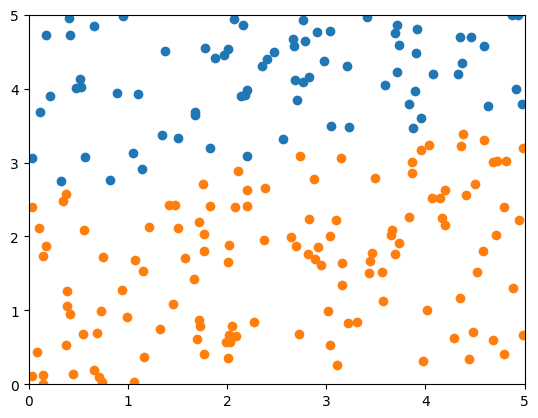

In [66]:
P1 = perceptron(2,0.1,sgn_function)
P1.training(X_linear,Y_linear,100)
print("Accuracy: " + str(P1.accuracy[99]*100) + "%")

plt.scatter(blue_linear[:,0],blue_linear[:,1])
plt.scatter(red_linear[:,0],red_linear[:,1])

plt.xlim(0, 5)
plt.ylim(0, 5)

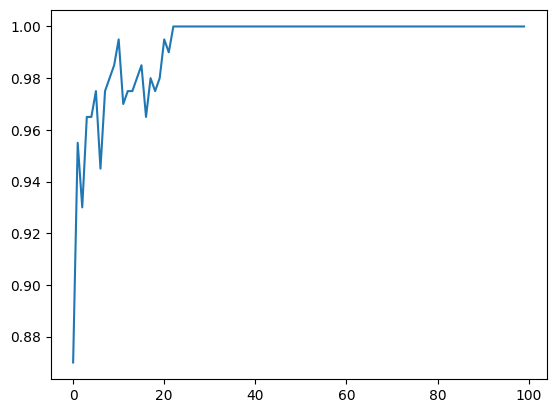

In [67]:
plt.plot(P1.accuracy)

(0.0, 5.0)

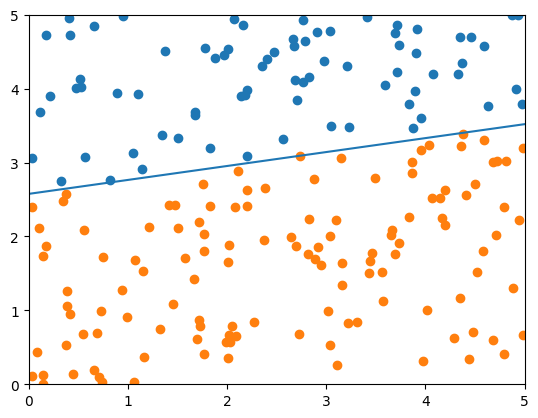

In [68]:
pesos = P1.getWeights()
x_weights = np.linspace(0,5)
y_weights = -(pesos[1]/pesos[2])*x_weights - (pesos[0]/pesos[2])
plt.plot(x_weights,y_weights)
plt.scatter(blue_linear[:,0],blue_linear[:,1])
plt.scatter(red_linear[:,0],red_linear[:,1])

plt.xlim(0, 5)
plt.ylim(0, 5)

Accuracy: 100.0%


(-0.5, 1.5)

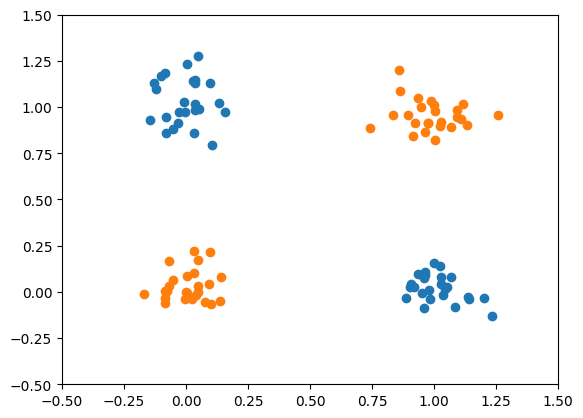

In [73]:
P2 = perceptron(1,0.1,xor_function)
P2.training(x_xor_processed,Yxor,100)
print("Accuracy: " + str(P2.accuracy[99]*100) + "%")

plt.scatter(blue_xor[:,0],blue_xor[:,1])
plt.scatter(red_xor[:,0],red_xor[:,1])

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

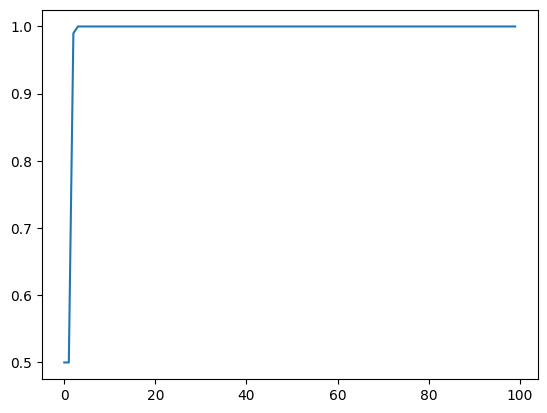

In [74]:
plt.plot(P2.accuracy)

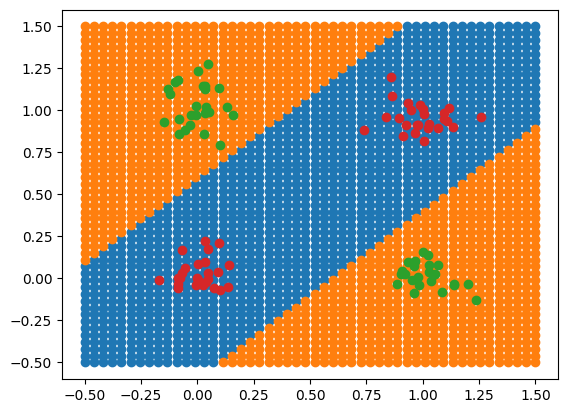

In [75]:
red_boundary = []
blue_boundary = []

x_data = np.linspace(-0.5,1.5)
y_data = np.linspace(-0.5,1.5)

X, Y = np.meshgrid(x_data, y_data)

i = 0
for x_dat,y_dat in zip(X,Y):
    for xi,yi in zip(x_dat,y_dat):
        if P2.predict(np.array([abs(xi - yi)])) == 1:
            red_boundary.append([xi,yi])
        else:
            blue_boundary.append([xi,yi])
red_boundary = np.array(red_boundary)
blue_boundary = np.array(blue_boundary)
plt.scatter(blue_boundary[:,0],blue_boundary[:,1])
plt.scatter(red_boundary[:,0],red_boundary[:,1])
plt.scatter(blue_xor[:,0],blue_xor[:,1])
plt.scatter(red_xor[:,0],red_xor[:,1])
        

Accuracy: 100.0%


(-3.5, 3.5)

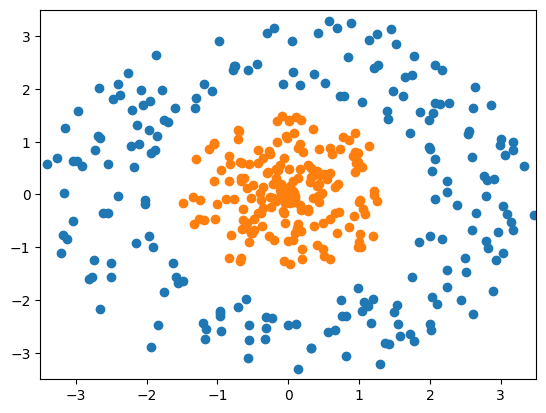

In [79]:
P3 = perceptron(1,0.1,sgn_negativo)
P3.training(x_nonlinear_processed,Ynonlinear,100)
print("Accuracy: " + str(P3.accuracy[99]*100) + "%")
plt.scatter(blue_nolinear[:,0],blue_nolinear[:,1])
plt.scatter(red_nolinear[:,0],red_nolinear[:,1])


plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

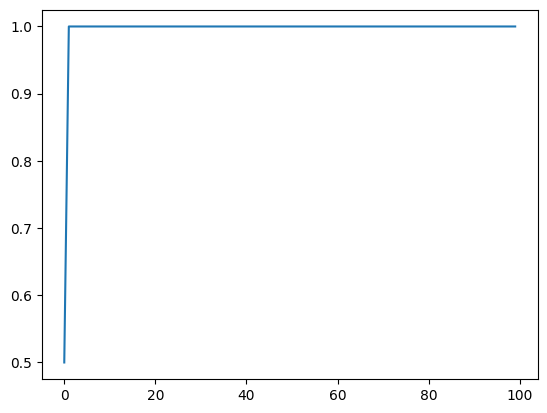

In [80]:
plt.plot(P3.accuracy)

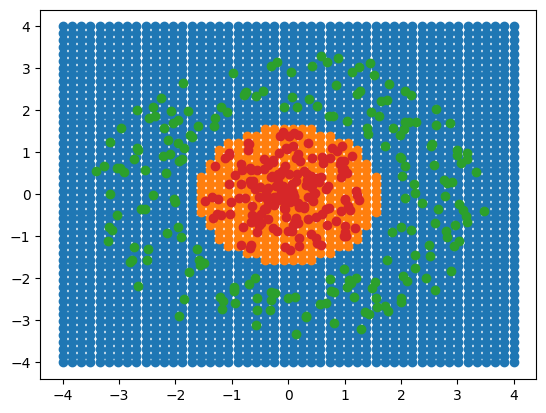

In [82]:
red_boundary = []
blue_boundary = []

x_data = np.linspace(-4,4)
y_data = np.linspace(-4,4)

X, Y = np.meshgrid(x_data, y_data)

for x_dat,y_dat in zip(X,Y):
    for xi,yi in zip(x_dat,y_dat):
        if P3.predict(np.array([xi**2 + yi**2])) == 1:
            red_boundary.append([xi,yi])
        else:
            blue_boundary.append([xi,yi])

red_boundary = np.array(red_boundary)
blue_boundary = np.array(blue_boundary)
plt.scatter(blue_boundary[:,0],blue_boundary[:,1])
plt.scatter(red_boundary[:,0],red_boundary[:,1])
plt.scatter(blue_nolinear[:,0],blue_nolinear[:,1])
plt.scatter(red_nolinear[:,0],red_nolinear[:,1])


Implementación de Algoritmo de Aprendizaje En Batch: 

-  Implemente el algoritmo de aprendizaje batch del perceptrón y corra el mismo por 100 épocas. Inicializando los pesos de forma aleatoria para los tres datasets. En todos los casos enfóquese en medir el accuracy. 

-  Para los tres datasets recopile el accuracy por época y genere gráficos de accuracy versus época. 

-  Para todos los datasets dibuje el decision boundary (es decir, el hiperplano que divide los datos entre categoría +1 y -1.)

In [41]:
class perceptron_batch(object):
    def __init__(self,size,learning_rate, function):
        self.weights = np.random.randn(size+1)
        self.learning_rate = learning_rate
        self.accuracy = []
        self.activation = function

    def getWeights(self):
        return self.weights
    
    def getAccuracy(self,X,Y):
        predicciones = []
        for xi in X:
            predicciones.append(self.predict(xi))
        temp = 0
        for i in range(len(predicciones)):
            if predicciones[i] == Y[i]:
                temp += 1
        return temp/len(predicciones)

    def predict(self, data):
        V = np.dot(data,self.weights[1:]) + self.weights[0]
        return self.activation(V)
    
    def updates_weights(self,error,xi):
        self.weights[1:] += self.learning_rate*error*xi
        self.weights[0] += self.learning_rate*error
    
    def training(self,X,Y,epochs):
        for i in range(epochs):
            errors = []
            for xi,yi in zip(X,Y):
                errors.append(yi - self.predict(xi))
            for error,xi in zip(errors,X):
                self.updates_weights(error,xi)
            self.accuracy.append(self.getAccuracy(X,Y))

Accuracy: 99.5%


(0.0, 5.0)

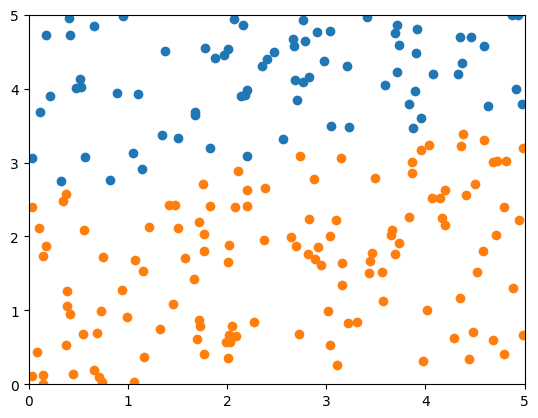

In [83]:
P1_batch = perceptron_batch(2,0.1,sgn_function)
P1_batch.training(X_linear,Y_linear,100)
print("Accuracy: " + str(P1_batch.accuracy[99]*100) + "%")

plt.scatter(blue_linear[:,0],blue_linear[:,1])
plt.scatter(red_linear[:,0],red_linear[:,1])

plt.xlim(0, 5)
plt.ylim(0, 5)

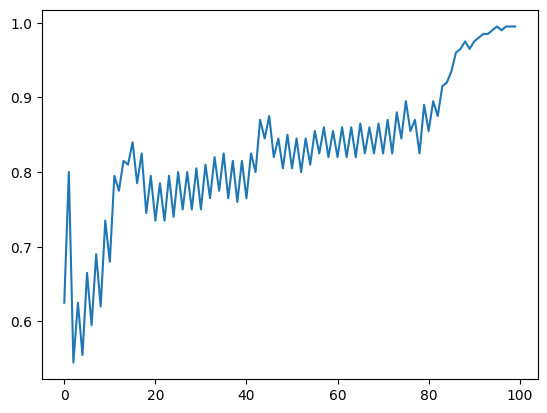

In [84]:
plt.plot(P1_batch.accuracy)

(0.0, 5.0)

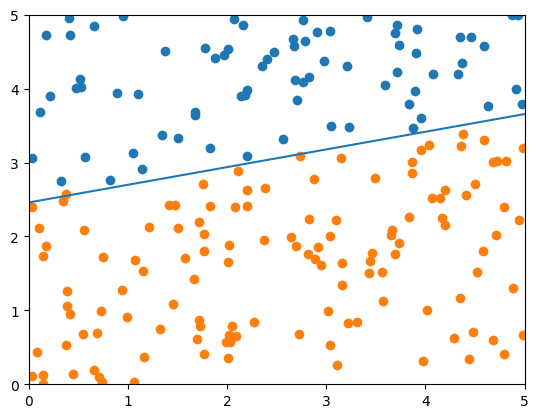

In [85]:
pesos = P1_batch.getWeights()
x_weights = np.linspace(0,5)
y_weights = -(pesos[1]/pesos[2])*x_weights - (pesos[0]/pesos[2])
plt.plot(x_weights,y_weights)
plt.scatter(blue_linear[:,0],blue_linear[:,1])
plt.scatter(red_linear[:,0],red_linear[:,1])

plt.xlim(0, 5)
plt.ylim(0, 5)

Accuracy: 100.0%


(-0.5, 1.5)

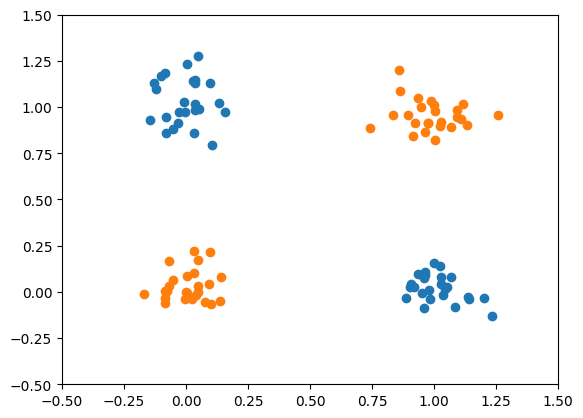

In [86]:
P2_batch = perceptron_batch(1,0.1,xor_function)
P2_batch.training(x_xor_processed,Yxor,100)
print("Accuracy: " + str(P2_batch.accuracy[99]*100) + "%")

plt.scatter(blue_xor[:,0],blue_xor[:,1])
plt.scatter(red_xor[:,0],red_xor[:,1])

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

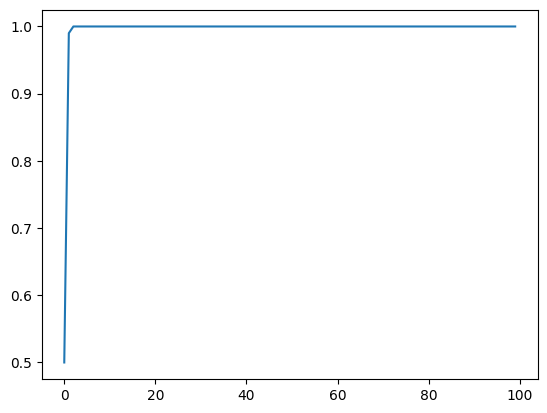

In [87]:
plt.plot(P2_batch.accuracy)

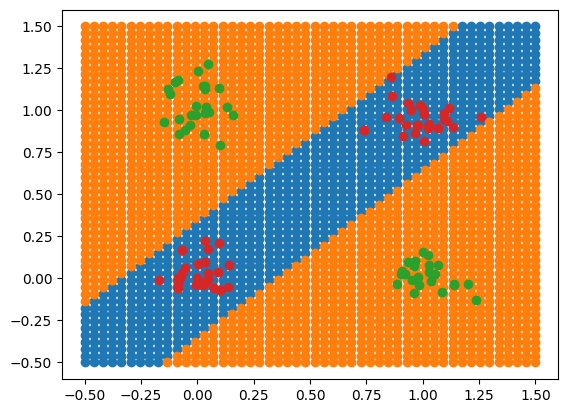

In [88]:
red_boundary = []
blue_boundary = []

x_data = np.linspace(-0.5,1.5)
y_data = np.linspace(-0.5,1.5)

X, Y = np.meshgrid(x_data, y_data)

i = 0
for x_dat,y_dat in zip(X,Y):
    for xi,yi in zip(x_dat,y_dat):
        if P2_batch.predict(np.array([abs(xi - yi)])) == 1:
            red_boundary.append([xi,yi])
        else:
            blue_boundary.append([xi,yi])
red_boundary = np.array(red_boundary)
blue_boundary = np.array(blue_boundary)
plt.scatter(blue_boundary[:,0],blue_boundary[:,1])
plt.scatter(red_boundary[:,0],red_boundary[:,1])
plt.scatter(blue_xor[:,0],blue_xor[:,1])
plt.scatter(red_xor[:,0],red_xor[:,1])

Accuracy: 100.0%


(-3.5, 3.5)

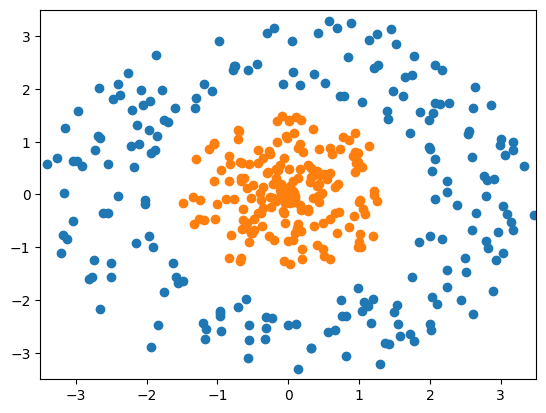

In [89]:
P3_batch = perceptron_batch(1,0.1,sgn_negativo)
P3_batch.training(x_nonlinear_processed,Ynonlinear,100)
print("Accuracy: " + str(P3_batch.accuracy[99]*100) + "%")
plt.scatter(blue_nolinear[:,0],blue_nolinear[:,1])
plt.scatter(red_nolinear[:,0],red_nolinear[:,1])


plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

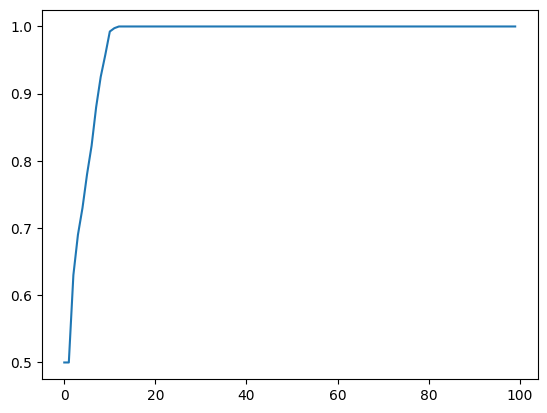

In [90]:
plt.plot(P3_batch.accuracy)

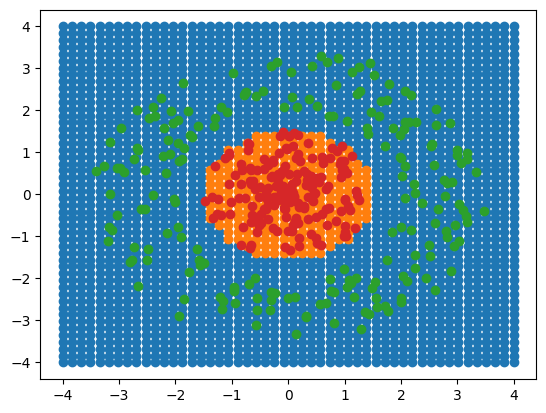

In [91]:
red_boundary = []
blue_boundary = []

x_data = np.linspace(-4,4)
y_data = np.linspace(-4,4)

X, Y = np.meshgrid(x_data, y_data)

for x_dat,y_dat in zip(X,Y):
    for xi,yi in zip(x_dat,y_dat):
        if P3_batch.predict(np.array([xi**2 + yi**2])) == 1:
            red_boundary.append([xi,yi])
        else:
            blue_boundary.append([xi,yi])

red_boundary = np.array(red_boundary)
blue_boundary = np.array(blue_boundary)
plt.scatter(blue_boundary[:,0],blue_boundary[:,1])
plt.scatter(red_boundary[:,0],red_boundary[:,1])
plt.scatter(blue_nolinear[:,0],blue_nolinear[:,1])
plt.scatter(red_nolinear[:,0],red_nolinear[:,1])

3. Comparar las soluciones:
* Luego de la implementación de las secciones 1 y 2, compare los resultados obtenidos y presente sus conclusiones.

A continuación se compara el proceso de entrenamiento con respecto a las épocas de iteración que presenta el perceptron tipo batch y tipo secuencial para las 3 tablas de datos. 

* Data lineal

Text(0.5, 1.0, 'Perceptron training methods')

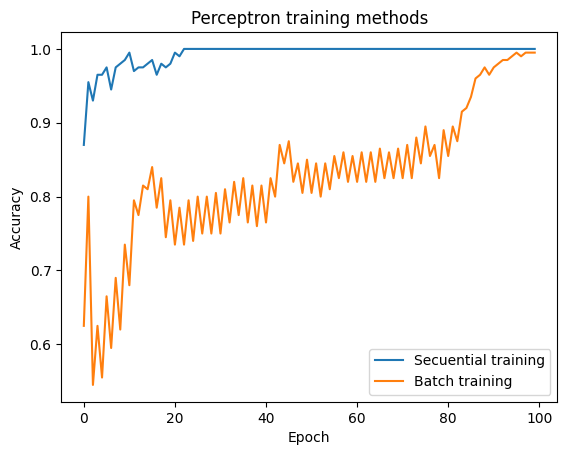

In [92]:
plt.plot(P1.accuracy,label= "Secuential training")
plt.plot(P1_batch.accuracy,label= "Batch training")
plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Perceptron training methods')

Se puede concluir algunas cosas.

* Escoger una inicialización randómica de los pesos del perceptrón hace que ambos modelos tengan diferente inicio de la exactitud del modelo. 

* Podemos observar que el algoritmo Batch presenta un comportamiento errático durante su entrenamiento con el paso de las épocas hasta que encuentra un camino de convergencia.

* El algoritmo Secuencial logra converger a un modelo 100% preciso de manera más rápida que el algoritmo Batch con el trade off de que si se usa gran cantidad de datos, no se puede parar el proceso de actualización. De esta forma el algoritmo Batch puede ser entrenado en una GPU. 

* Data XOR

Text(0.5, 1.0, 'Perceptron training methods')

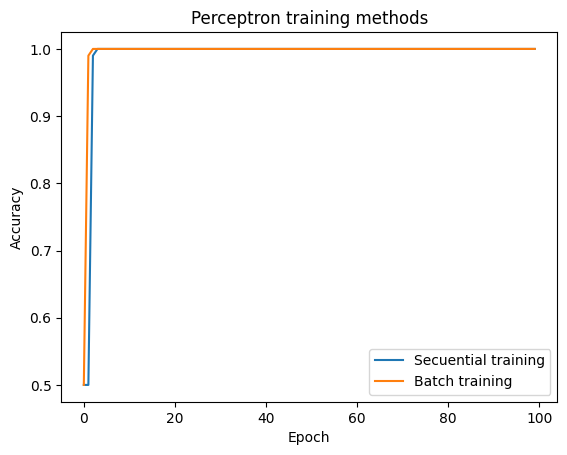

In [93]:
plt.plot(P2.accuracy,label= "Secuential training")
plt.plot(P2_batch.accuracy,label= "Batch training")
plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Perceptron training methods')

En este caso se concluye que ambos tipos de entrenamiento dan una respuesta similar en tiempo. El único cambio se debe a la aleatoriedad inicial. 

* Data no lineal

Text(0.5, 1.0, 'Perceptron training methods')

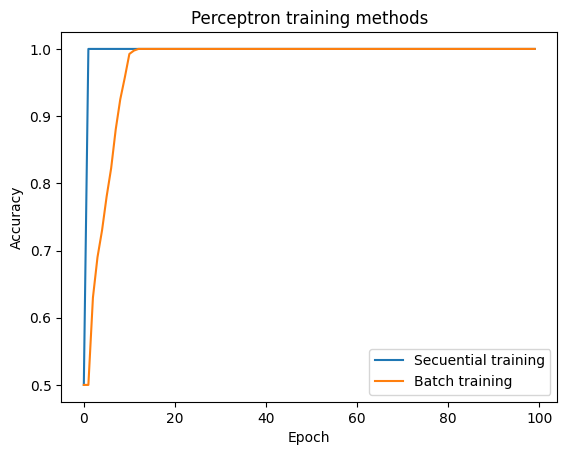

In [94]:
plt.plot(P3.accuracy,label= "Secuential training")
plt.plot(P3_batch.accuracy,label= "Batch training")
plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Perceptron training methods')

Para este caso, la data no lineal afecta en el tiempo de convergencia del algoritmo batch ya que no se está actualizando en cada predicción los pesos del perceptrón. De esta forma su convergencia es más lenta.